In [1]:
# Load libraries

# # Plotting utils 
import datetime
import glob
import os
import warnings
from datetime import date, timedelta
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util
import matplotlib as matplotlib
import matplotlib.animation as animation
import matplotlib.colors as colors
import matplotlib.dates as mdates
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
#import Ngl
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

warnings.filterwarnings('ignore')


In [2]:
def preprocess_lasso(ds):
    keepVars = ['T','q','omega','divT','divq','Prec','lhflx','shflx','Ps','totcld','cldht']
    
    dsSel = ds[keepVars].load()
    
    ## Convert to local time
    localTimes  = dsSel['time'].values - np.timedelta64(5,'h')
    dsSel       = dsSel.assign_coords({"time": localTimes})

    
    return dsSel

In [3]:
fileDir = '/project/amp/mdfowler/CLASP/inputData/LASSO_fromFinley/'

listFiles = np.sort(glob.glob(fileDir+'*LASSO*'))

lassoDS = xr.open_mfdataset(listFiles,  preprocess=preprocess_lasso, concat_dim='time', 
                                combine='nested', decode_times=True, 
                                data_vars='minimal')
    

In [4]:
## Find days where the rain rate reaches the above threshold, 
##     and the time at which that max is reached/when rain starts

rain_mmhr = lassoDS.Prec.isel(lat=0,lon=0) * 3600  ## Convert from mm/s to mm/hr
DayMaxRain = rain_mmhr.resample(time='1D').max().dropna(dim='time')

cutoff     = 0.5 ## Threshold for where consider it a decent 'rain' event or not 
iRaining = np.where(DayMaxRain>=cutoff)[0]
print('Fraction of days with >= %f mm/hr of rain: %f' % (cutoff, len(iRaining)/len(lassoDS.Prec.values)))
print('Actual number of days = %i' % (len(iRaining)))


iCount = 0 # Number of days saved 

for iDay in range(len(DayMaxRain.time.values)):
    
    if DayMaxRain[iDay]>=cutoff:
    
        iTimes = np.where( (lassoDS['time.year'].values == DayMaxRain['time.year'].values[iDay]) & 
                           (lassoDS['time.month'].values == DayMaxRain['time.month'].values[iDay]) &  
                           (lassoDS['time.day'].values == DayMaxRain['time.day'].values[iDay]) )[0]
        
        dayDS = lassoDS.isel(time=iTimes,lat=0,lon=0)
        
        ## Save info about when the max prect occurs
        imax  = np.where((dayDS.Prec.values*3600)==DayMaxRain.values[iDay])[0]
        if iCount==0:
            maxRainDS = dayDS.isel(time=imax)
        else: 
            maxRainDS = xr.concat([maxRainDS, dayDS.isel(time=imax)], dim='time')
            
        
            
        iCount = iCount+1
    else:
        print('Skipping day %12s, max rainfall = %.2f mm/hr' % 
              (DayMaxRain['time'].values[iDay].astype(str), DayMaxRain.values[iDay]))
    
    



Fraction of days with >= 0.500000 mm/hr of rain: 0.004177
Actual number of days = 322
Skipping day 2012-05-02T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2012-05-03T00:00:00.000000000, max rainfall = 0.09 mm/hr
Skipping day 2012-05-04T00:00:00.000000000, max rainfall = 0.20 mm/hr
Skipping day 2012-05-05T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2012-05-06T00:00:00.000000000, max rainfall = 0.41 mm/hr
Skipping day 2012-05-07T00:00:00.000000000, max rainfall = 0.43 mm/hr
Skipping day 2012-05-08T00:00:00.000000000, max rainfall = 0.03 mm/hr
Skipping day 2012-05-09T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2012-05-10T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2012-05-12T00:00:00.000000000, max rainfall = 0.45 mm/hr
Skipping day 2012-05-13T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2012-05-14T00:00:00.000000000, max rainfall = 0.01 mm/hr
Skipping day 2012-05-15T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skip

Skipping day 2013-05-16T00:00:00.000000000, max rainfall = 0.05 mm/hr
Skipping day 2013-05-17T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2013-05-22T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2013-05-24T00:00:00.000000000, max rainfall = 0.01 mm/hr
Skipping day 2013-05-25T00:00:00.000000000, max rainfall = 0.07 mm/hr
Skipping day 2013-05-26T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2013-05-27T00:00:00.000000000, max rainfall = 0.03 mm/hr
Skipping day 2013-05-28T00:00:00.000000000, max rainfall = 0.08 mm/hr
Skipping day 2013-06-02T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2013-06-03T00:00:00.000000000, max rainfall = 0.38 mm/hr
Skipping day 2013-06-06T00:00:00.000000000, max rainfall = 0.02 mm/hr
Skipping day 2013-06-07T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2013-06-10T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2013-06-11T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2013-06

Skipping day 2014-06-16T00:00:00.000000000, max rainfall = 0.01 mm/hr
Skipping day 2014-06-17T00:00:00.000000000, max rainfall = -0.00 mm/hr
Skipping day 2014-06-18T00:00:00.000000000, max rainfall = 0.01 mm/hr
Skipping day 2014-06-20T00:00:00.000000000, max rainfall = 0.27 mm/hr
Skipping day 2014-06-21T00:00:00.000000000, max rainfall = 0.05 mm/hr
Skipping day 2014-06-27T00:00:00.000000000, max rainfall = 0.08 mm/hr
Skipping day 2014-06-29T00:00:00.000000000, max rainfall = 0.08 mm/hr
Skipping day 2014-07-02T00:00:00.000000000, max rainfall = 0.07 mm/hr
Skipping day 2014-07-03T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2014-07-04T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2014-07-05T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2014-07-06T00:00:00.000000000, max rainfall = 0.01 mm/hr
Skipping day 2014-07-07T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2014-07-08T00:00:00.000000000, max rainfall = 0.08 mm/hr
Skipping day 2014-0

Skipping day 2015-07-24T00:00:00.000000000, max rainfall = -0.00 mm/hr
Skipping day 2015-07-25T00:00:00.000000000, max rainfall = 0.07 mm/hr
Skipping day 2015-07-26T00:00:00.000000000, max rainfall = 0.17 mm/hr
Skipping day 2015-07-27T00:00:00.000000000, max rainfall = 0.03 mm/hr
Skipping day 2015-07-28T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2015-07-29T00:00:00.000000000, max rainfall = 0.33 mm/hr
Skipping day 2015-08-01T00:00:00.000000000, max rainfall = 0.02 mm/hr
Skipping day 2015-08-02T00:00:00.000000000, max rainfall = 0.04 mm/hr
Skipping day 2015-08-03T00:00:00.000000000, max rainfall = 0.05 mm/hr
Skipping day 2015-08-06T00:00:00.000000000, max rainfall = 0.02 mm/hr
Skipping day 2015-08-07T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2015-08-08T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2015-08-09T00:00:00.000000000, max rainfall = 0.10 mm/hr
Skipping day 2015-08-11T00:00:00.000000000, max rainfall = 0.01 mm/hr
Skipping day 2015-0

Skipping day 2016-08-27T00:00:00.000000000, max rainfall = 0.13 mm/hr
Skipping day 2016-08-29T00:00:00.000000000, max rainfall = 0.39 mm/hr
Skipping day 2016-09-01T00:00:00.000000000, max rainfall = 0.45 mm/hr
Skipping day 2016-09-02T00:00:00.000000000, max rainfall = 0.01 mm/hr
Skipping day 2016-09-03T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2016-09-04T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2016-09-05T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2016-09-06T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2016-09-07T00:00:00.000000000, max rainfall = 0.11 mm/hr
Skipping day 2016-09-11T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2016-09-12T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2016-09-13T00:00:00.000000000, max rainfall = 0.18 mm/hr
Skipping day 2016-09-14T00:00:00.000000000, max rainfall = 0.35 mm/hr
Skipping day 2016-09-15T00:00:00.000000000, max rainfall = 0.38 mm/hr
Skipping day 2016-09

Skipping day 2018-05-04T00:00:00.000000000, max rainfall = 0.02 mm/hr
Skipping day 2018-05-05T00:00:00.000000000, max rainfall = -0.00 mm/hr
Skipping day 2018-05-06T00:00:00.000000000, max rainfall = -0.00 mm/hr
Skipping day 2018-05-07T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2018-05-08T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2018-05-09T00:00:00.000000000, max rainfall = 0.23 mm/hr
Skipping day 2018-05-11T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2018-05-12T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2018-05-13T00:00:00.000000000, max rainfall = 0.20 mm/hr
Skipping day 2018-05-17T00:00:00.000000000, max rainfall = 0.04 mm/hr
Skipping day 2018-05-21T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2018-05-22T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2018-05-26T00:00:00.000000000, max rainfall = -0.00 mm/hr
Skipping day 2018-05-27T00:00:00.000000000, max rainfall = 0.00 mm/hr
Skipping day 2018

In [5]:
textFile = '/project/amp/mdfowler/CLASP/WRFLESdateStrings.txt'
with open(textFile) as f:
    lesDates = f.readlines()

lesDates = [line.rstrip('\n') for line in lesDates]

In [6]:
## Select events with peak rain in afternoon/evening
iTargets = np.where( (maxRainDS['time.hour'].values>=15) & (maxRainDS['time.hour'].values<=21) & 
                     (maxRainDS['time.year'].values>=2015))[0]

# fig,axs = plt.subplots(7,6,figsize=(18,18))
# axs     = axs.ravel()

# for iDay in range(len(iTargets)):
#         iTimes = np.where( (lassoDS['time.year'].values == maxRainDS.isel(time=iTargets[iDay])['time.year'].values) & 
#                            (lassoDS['time.month'].values == maxRainDS.isel(time=iTargets[iDay])['time.month'].values) &  
#                            (lassoDS['time.day'].values == maxRainDS.isel(time=iTargets[iDay])['time.day'].values) & 
#                            (lassoDS['time.hour'].values>=8) )[0]
        
#         dayDS = lassoDS.isel(time=iTimes,lat=0,lon=0)
        
#         axs[iDay].plot(dayDS['time.hour'].values, dayDS.Prec.values*3600)
#         axs[iDay].set_title(maxRainDS.isel(time=iTargets[iDay]).time.values.astype(str)[0:10])
        
#         # Do we have LES simulation of this?
#         thisDayStr = maxRainDS.isel(time=iTargets[iDay]).time.values.astype(str)[0:4]+maxRainDS.isel(time=iTargets[iDay]).time.values.astype(str)[5:7]+maxRainDS.isel(time=iTargets[iDay]).time.values.astype(str)[8:10]
#         iMatchLES  = np.where(lesDates==thisDayStr)[0]
#         if len(iMatchLES)>0:
#             axs[iDay].plot(10,0.5,'r*', markersize=5)
            
#         ## Build easy arrays for running lots of cases 
#         if iDay==0:
#             yrStrings  = maxRainDS.isel(time=iTargets[iDay]).time.values.astype(str)[0:4]+','
#             monStrings = maxRainDS.isel(time=iTargets[iDay]).time.values.astype(str)[5:7]+','
#             dayStrings = maxRainDS.isel(time=iTargets[iDay]).time.values.astype(str)[8:10]+','
#         else: 
#             yrStrings  = yrStrings+maxRainDS.isel(time=iTargets[iDay]).time.values.astype(str)[0:4]+','
#             monStrings = monStrings+maxRainDS.isel(time=iTargets[iDay]).time.values.astype(str)[5:7]+','
#             dayStrings = dayStrings+maxRainDS.isel(time=iTargets[iDay]).time.values.astype(str)[8:10]+','
        
# fig.subplots_adjust(hspace = 0.35, wspace=0.35)

#### A few plots along the way

In [7]:
# fig, axs= plt.subplots(1,1, figsize=(12,5))

# plt.plot(rain_mmhr['time'].values[(24*4)*2:(24*4)*3], rain_mmhr.values[(24*4)*2:(24*4)*3])


In [50]:
testDayMax = rain_mmhr.resample(time='1D').max().dropna(dim='time')

In [57]:
testDayMax[4]

<xarray.DataArray 'Prec' ()>
array(0.20057133, dtype=float32)
Coordinates:
    time     datetime64[ns] 2012-05-04
    lat      float64 36.6
    lon      float64 262.5

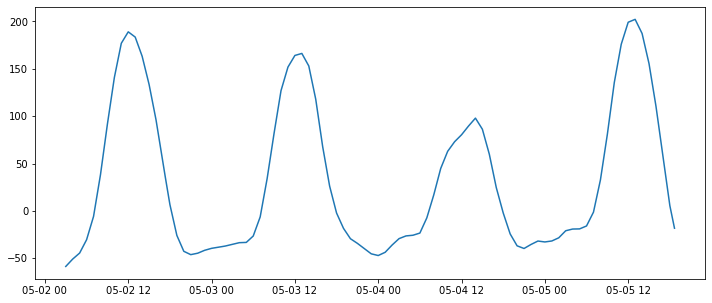

In [77]:
fig, axs= plt.subplots(1,1, figsize=(12,5))

plt.plot(rain_mmhr['time'].values[96:360], lassoDS.shflx.isel(lon=0,lat=0).values[96:360])


## Read in SCAM data that was created for the target dates above

In [9]:
# Grabbed from Brian M. to use time midpoints, not end periods
def cesm_correct_time(ds):
    """Given a Dataset, check for time_bnds,
       and use avg(time_bnds) to replace the time coordinate.
       Purpose is to center the timestamp on the averaging inverval.   
       NOTE: ds should have been loaded using `decode_times=False`
    """
    assert 'time_bnds' in ds
    assert 'time' in ds
    correct_time_values = ds['time_bnds'].mean(dim='nbnd')
    # copy any metadata:
    correct_time_values.attrs = ds['time'].attrs
    ds = ds.assign_coords({"time": correct_time_values})
    ds = xr.decode_cf(ds)  # decode to datetime objects
    return ds

def interpolateToPressure_v2(DS, varName, pressGoals):
#     nCases = len(DSin.case.values)
#     nTimes = len(DSin.time.values)
    
#     saveOut = np.full([nTimes,len(pressGoals),1,1], np.nan)

    ## For the larger arrays, need to operate case-by-case; input to vinth2p can only be 3 or 4 dimensions. 
#     for iCase in range(nCases): 
#     DS = DSin

    p0mb = DS.P0.values/100        # mb

    # Pull out hya/hyb profiles 
    hyam = np.squeeze(DS.hyam.values)[:]
    hybm = np.squeeze(DS.hybm.values)[:]
    hyai = np.squeeze(DS.hyai.values)[:]
    hybi = np.squeeze(DS.hybi.values)[:]

    # Surface pressure with time dimension
    PS   = DS.PS.values              # Pa 

    # Converting variables: 
    if np.shape(DS[varName].values)[1]==len(DS.ilev.values):
        varInterp = Ngl.vinth2p(DS[varName].values,hyai,hybi,pressGoals,PS,1,p0mb,1,True)
    elif np.shape(DS[varName].values)[1]==len(DS.lev.values):
        varInterp = Ngl.vinth2p(DS[varName].values,hyam,hybm,pressGoals,PS,1,p0mb,1,True)
    ## Handle data that's by-plume for EDMF output
    elif np.shape(DS[varName].values)[1]==len(DS.nens.values):
        varInterp = np.full([len(DS.time.values), len(DS.nens.values) ,
                             len(pressGoals), len(DS.lat.values), len(DS.lon.values)], np.nan)
        
        for iEns in range(len(DS.nens.values)):
            varInterp[:,iEns,:,:,:] = Ngl.vinth2p(DS[varName].values[:,iEns,:,:,:],hyai,hybi,pressGoals,PS,1,p0mb,1,True)

    saveOut = varInterp
    
    return saveOut

def interpolateToPressure_v2_h2(DS, DSctrl, varName, pressGoals):
#     nCases = len(DSin.case.values)
#     nTimes = len(DSin.time.values)
    
#     saveOut = np.full([nTimes,len(pressGoals),1,1], np.nan)

    ## For the larger arrays, need to operate case-by-case; input to vinth2p can only be 3 or 4 dimensions. 
#     for iCase in range(nCases): 
#     DS = DSin

    p0mb = DSctrl.P0.values/100        # mb

    # Pull out hya/hyb profiles 
    hyam = np.squeeze(DSctrl.hyam.values)[:]
    hybm = np.squeeze(DSctrl.hybm.values)[:]
    hyai = np.squeeze(DSctrl.hyai.values)[:]
    hybi = np.squeeze(DSctrl.hybi.values)[:]

    # Surface pressure with time dimension
    PS   = DSctrl.PS.values              # Pa 

    # Converting variables: 
    if np.shape(DS[varName].values)[1]==len(DS.ilev.values):
        varInterp = Ngl.vinth2p(DS[varName].values,hyai,hybi,pressGoals,PS,1,p0mb,1,True)
    elif np.shape(DS[varName].values)[1]==len(DS.lev.values):
        varInterp = Ngl.vinth2p(DS[varName].values,hyam,hybm,pressGoals,PS,1,p0mb,1,True)
    ## Handle data that's by-plume for EDMF output
    elif np.shape(DS[varName].values)[1]==len(DS.nens.values):
        varInterp = np.full([len(DS.time.values), len(DS.nens.values) ,
                             len(pressGoals), len(DS.lat.values), len(DS.lon.values)], np.nan)
        
        for iEns in range(len(DS.nens.values)):
            varInterp[:,iEns,:,:,:] = Ngl.vinth2p(DS[varName].values[:,iEns,:,:,:],hyai,hybi,pressGoals,PS,1,p0mb,1,True)

    saveOut = varInterp
    
    return saveOut


def process_camData(DS):
    ## Add evaporative fraction to DS 
    ds_EF = DS.LHFLX.values / (DS.LHFLX.values + DS.SHFLX.values)
    DS['EvapFraction'] = (('time'), np.squeeze(ds_EF))

    ## Define the actual vertical velocity skew, not just the third order moment 
    skw_W = DS.WP3_CLUBB.values / ((DS.WP2_CLUBB.values)**1.5)
    DS['Skw_W'] = (('time','ilev'), np.squeeze(skw_W))

    ## Add in TKE 
    DS['TKE']  = (('time','ilev','lat,','lon'),
                       0.5*(DS['UP2_CLUBB']+DS['VP2_CLUBB']+DS['WP2_CLUBB'])) 
    # DS['TKE'].attrs['units']   = 'm2/s2'
    # DS['TKE'].attrs['long_name']   = 'Turbulent Kinetic Energy'
    
    ## Add in wind speed 
    DS['WindMagnitude']  = (('time','lev','lat,','lon'),
                                    np.sqrt((DS.U.values**2.0) + (DS.V.values**2.0)) )
    
    # DS['WindMagnitude'].attrs['units']   = 'm/s'
    # DS['WindMagnitude'].attrs['long_name']   = 'Wind speed'

    
    ## Interpolate to standard levels 
    # - - - - - - - - - - - - - - - - - - - - - - - -
    print('Beginning interpolation...') 
    
    # Decide on levels to interpoalte to and add to larger arrays
    pnew64 = np.arange(200.0,980.0,10.0) 

#     p0mb   = DS.P0.values/100        # mb 
#     hyam   = np.squeeze(DS.hyam.values)[:]
#     hybm   = np.squeeze(DS.hybm.values)[:]
#     pnew64 = p0mb*hyam + p0mb*hybm
#     pnew64 = pnew64[20:-4]
    
    DS = DS.assign_coords({"levInterp": pnew64})

    varSels = np.asarray(['THLP2_CLUBB','RTP2_CLUBB','RTPTHLP_CLUBB','WPRTP_CLUBB','WPTHLP_CLUBB','WP3_CLUBB','WP2_CLUBB','UP2_CLUBB',
                          'VP2_CLUBB','TKE','Z3','U','V','T','Q','OMEGA','RVMTEND_CLUBB','STEND_CLUBB','CLDLIQ','CLOUD','CLOUDFRAC_CLUBB',
                          'UPWP_CLUBB','THETAL','WindMagnitude','CONCLD','QT','GCLDLWP',
#                           'edmf_upa','edmf_upw','edmf_upqt','edmf_upthl','edmf_cloudfrac','edmf_dnw','edmf_precc',
#                           'edmf_upbuoy','edmf_updet','edmf_upent',
#                           ## Add budget terms 
                          # 'thlp2','thlp2_bt','thlp2_cl','thlp2_dp1','thlp2_dp2','thlp2_forcing','thlp2_ma','thlp2_mc','thlp2_pd',
                          # 'thlp2_sf','thlp2_ta','thlp2_tp','thlp2_zt', 
#                           'wp2','wp2_ac','wp2_bp','wp2_bt','wp2_cl','wp2_dp1','wp2_dp2','wp2_ma', 'wp2_pd','wp2_pr1','wp2_pr2',
#                           'wp2_pr3','wp2_sf','wp2_ta','wp2_zt',
#                           'wpthlp','wprtp','rtp2',
#                           'thlm','rtm','wm_zm','rtm_zm','thlm_zm',
                          # 'wp2rcp','wp2rtp','wp2thlp','wp2thvp','wp3_on_wp2','wp3_on_wp2_zt','wprtp',
                          # 'wprtp2','wprtp_ac','wprtp_bp','wprtp_bt','wprtp_cl','wprtp_dp1','wprtp_enter_mfl','wprtp_exit_mfl',
                          # 'wprtp_forcing','wprtp_ma','wprtp_mc','wprtp_mfl','wprtp_mfl_max','wprtp_mfl_min','wprtp_pd',
                          # 'wprtp_pr1','wprtp_pr2','wprtp_pr3','wprtp_sicl','wprtp_ta','wprtp_tp','wprtp_zt',
                          # 'wprtpthlp','wpthlp','wpthlp2','wpthlp_ac','wpthlp_bp','wpthlp_bt','wpthlp_cl','wpthlp_dp1','wpthlp_entermfl',
                          # 'wpthlp_exit_mfl','wpthlp_forcing','wpthlp_ma','wpthlp_mc','wpthlp_mfl','wpthlp_mfl_max','wpthlp_mfl_min',
                          # 'wpthlp_pr1','wpthlp_pr2','wpthlp_pr3','wpthlp_sicl','wpthlp_ta','wpthlp_tp','wpthlp_zt'
                          ])

    for iVar in range(len(varSels)): 
        # varUnits = DS[varSels[iVar]].units
        # varName  = DS[varSels[iVar]].long_name

        # Interpolate variables and add to larger arrays 
        interpVar_real = interpolateToPressure_v2(DS, varSels[iVar], pnew64)

        if len(np.shape(interpVar_real))==4: 
            DS[varSels[iVar]+'_interp']  = (('time','levInterp','lat','lon'), interpVar_real)
        elif len(np.shape(interpVar_real))==5: 
            DS[varSels[iVar]+'_interp']  = (('time','nens','levInterp','lat','lon'), interpVar_real)

        ## Assign attibutes 
        # DS[varSels[iVar]+'_interp'].attrs['units']     = varUnits
        # DS[varSels[iVar]+'_interp'].attrs['long_name'] = varName

    # - - - - - - - - - - - - - - - - - - - - - - - -
      
#     ## Resample to 30m means? 
#     DS = DS.resample(time="30Min").mean()

    ## Compute vertical velocity as m/s rather than Pa/s 
#     w_mps = vertical_velocity( np.squeeze(DS['OMEGA_interp'].values)*units('Pa/s'), 
#                                np.squeeze(DS['levInterp'].values)*units.hPa, 
#                                np.squeeze(DS['T_interp'].values)*units.K )
#     w_mps_save = np.full([len(DS.time.values), 
#                       len(DS.levInterp.values), 
#                       len(DS.lat.values), 
#                       len(DS.lon.values)], np.nan)
#     w_mps_save[:,:,0,0] = w_mps
    
#     DS['w_mps'] = ( ('time','levInterp','lat,','lon'), w_mps_save)
                
    return DS


def preprocess_h0_getDay2(ds):

    keepVars = ['SWCF','LWCF','TS','CLOUD','FSNS','FLNS','PS','QREFHT',
                'U10','CLDHGH','CLDLIQ','CONCLD','TMQ','P0','hyam','hybm','hyai','hybi',
                'PHIS','USTAR','QT','GCLDLWP',
                'THETAL','CDNUMC','CLDBOT','CLDLOW',
                'CLDMED','CLDTOP','CLDTOT','THLP2_CLUBB','CLOUDCOVER_CLUBB','CLOUDFRAC_CLUBB',
                'RCM_CLUBB','RTP2_CLUBB','RTPTHLP_CLUBB','RVMTEND_CLUBB','STEND_CLUBB','UP2_CLUBB','UPWP_CLUBB',
                'VP2_CLUBB','T','Q','OMEGA','PBLH','U','V','WP2_CLUBB','WP3_CLUBB','WPRCP_CLUBB',
                'WPRTP_CLUBB',
                'WPTHLP_CLUBB','WPTHVP_CLUBB','Z3','PRECT','PRECC',
                # 'PRECZ',
                'TGCLDCWP','TGCLDLWP','GCLDLWP',
                'LHFLX','SHFLX','TREFHT','RHREFHT']
        
    ds         = cesm_correct_time(ds)
    ds['time'] = ds.indexes['time'].to_datetimeindex() 
        
    ## Select the second simulated day for analysis 
    iTimeStart_day2  = np.where( (ds.time.values >= (ds.time.values[0] + np.timedelta64(1,'D'))) & 
                                 (ds.time.values <= (ds.time.values[0] + np.timedelta64(2,'D'))))[0]
    dsSel      = ds.isel(time=np.sort(iTimeStart_day2))[keepVars]

    
    # Compute local time 
    localTimes = dsSel['time'].values - np.timedelta64(5,'h')
    dsSel      = dsSel.assign_coords({"time": localTimes})
    
#     ## Set some limits for hours? 
#     hrStart = 5
#     hrEnd   = 21

#     iHoursSCAM  = np.where( (dsSel['time.hour']>=7) & (dsSel['time.hour']<=21) )[0]
#     dsSel       = dsSel.isel(time=iHoursSCAM)   
    
    dsSel = dsSel.load()

    
        
    return dsSel

def preprocess_h0_getDay1(ds):

    keepVars = ['SWCF','LWCF','TS','CLOUD','FSNS','FLNS','PS','QREFHT',
                'U10','CLDHGH','CLDLIQ','CONCLD','TMQ','P0','hyam','hybm','hyai','hybi',
                'PHIS','USTAR','QT','GCLDLWP',
                'THETAL','CDNUMC','CLDBOT','CLDLOW',
                'CLDMED','CLDTOP','CLDTOT','THLP2_CLUBB','CLOUDCOVER_CLUBB','CLOUDFRAC_CLUBB',
                'RCM_CLUBB','RTP2_CLUBB','RTPTHLP_CLUBB','RVMTEND_CLUBB','STEND_CLUBB','UP2_CLUBB','UPWP_CLUBB',
                'VP2_CLUBB','T','Q','OMEGA','PBLH','U','V','WP2_CLUBB','WP3_CLUBB','WPRCP_CLUBB',
                'WPRTP_CLUBB',
                'WPTHLP_CLUBB','WPTHVP_CLUBB','Z3','PRECT','PRECC',
                # 'PRECZ',
                'TGCLDCWP','TGCLDLWP','GCLDLWP',
                'LHFLX','SHFLX','TREFHT','RHREFHT']
        
    ds         = cesm_correct_time(ds)
    ds['time'] = ds.indexes['time'].to_datetimeindex() 
        
    ## Select the second simulated day for analysis 
    iTimeStart_day1  = np.where( (ds.time.values <= (ds.time.values[0] + np.timedelta64(1,'D'))) )[0]
    dsSel      = ds.isel(time=np.sort(iTimeStart_day1))[keepVars]

    # Compute local time 
    localTimes = dsSel['time'].values - np.timedelta64(5,'h')
    dsSel      = dsSel.assign_coords({"time": localTimes})
    
#     ## Set some limits for hours? 
#     hrStart = 5
#     hrEnd   = 21

#     iHoursSCAM  = np.where( (dsSel['time.hour']>=7) & (dsSel['time.hour']<=21) )[0]
#     dsSel       = dsSel.isel(time=iHoursSCAM)   
    
    dsSel = dsSel.load()

    
        
    return dsSel


In [14]:
testDir     = [
               '/scratch/cluster/mdfowler/clubbMF_lateRainDays/', 
               '/scratch/cluster/mdfowler/clubbMF_lateRainDays/',
              ]

case_names  = [
#                'Lopt6_day1',
               'Lopt6_day2',
              'DummySecondCase_duplicate first one',

              ]

caseStart   = 'FSCAM.T42_T42.lasso.CLUBBMF_usePatchDataFALSE_setSfcFlxFALSE_clmInit_PRECTfix_'

caseStrings = [
#                 'Lopt6_lateRainDay.LASSO',
                'Lopt6_lateRainDay_asDay2.LASSO',
                'Lopt6_lateRainDay_asDay2.LASSO',
              ]


## Day 1 case
# listFiles    = np.sort(glob.glob(testDir+caseStart+caseStrings[iCase]+'*cam.h0*'))


for iCase in range(len(case_names)):
    print('*** Starting on case %s ***' % (case_names[iCase]))

    ## Get list of files 
    listFiles    = np.sort(glob.glob(testDir[iCase]+caseStart+caseStrings[iCase]+'*cam.h0*'))
    
    if case_names[iCase]=='Lopt6_day1':
        case_h0      = xr.open_mfdataset(listFiles,  preprocess=preprocess_h0_getDay1, concat_dim='time', 
                                    combine='nested', decode_times=False, 
                                    data_vars='minimal')
    else:
        case_h0      = xr.open_mfdataset(listFiles,  preprocess=preprocess_h0_getDay2, concat_dim='time', 
                            combine='nested', decode_times=False, 
                            data_vars='minimal')
    print('h0 files loaded')
        
    
    ## Process data 
#     procDS    = process_camData( case_h0 )
             
    ## Combine all the cases into 
    case_allDays      = case_h0.assign_coords({"case":  case_names[iCase]})
                        
    if iCase==0:
        scamDS    = case_allDays

    else: 
        scamDS    = xr.concat([scamDS, case_allDays], "case") 
            
    print('Done with case %i of %i ' % (iCase+1, len(case_names)))
    

*** Starting on case Lopt6_day2 ***
h0 files loaded
Done with case 1 of 2 
*** Starting on case DummySecondCase_duplicate first one ***
h0 files loaded
Done with case 2 of 2 


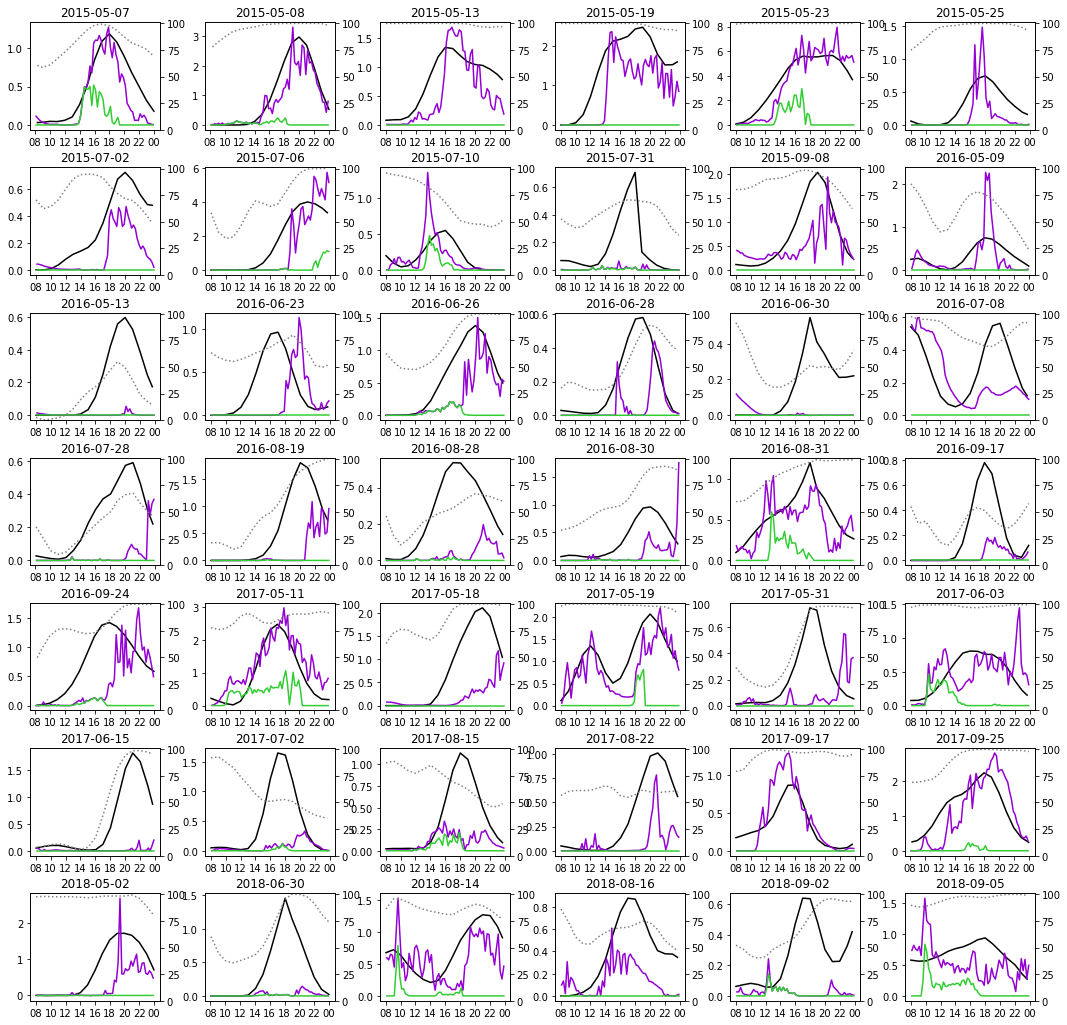

In [15]:
## Select events with peak rain in afternoon/evening
iTargets = np.where( (maxRainDS['time.hour'].values>=15) & (maxRainDS['time.hour'].values<=21) & 
                     (maxRainDS['time.year'].values>=2015))[0]

fig,axs = plt.subplots(7,6,figsize=(18,18))
axs     = axs.ravel()

for iDay in range(len(iTargets)):
        iTimes = np.where( (lassoDS['time.year'].values == maxRainDS.isel(time=iTargets[iDay])['time.year'].values) & 
                           (lassoDS['time.month'].values == maxRainDS.isel(time=iTargets[iDay])['time.month'].values) &  
                           (lassoDS['time.day'].values == maxRainDS.isel(time=iTargets[iDay])['time.day'].values) & 
                           (lassoDS['time.hour'].values>=8) )[0]
        
        dayDS = lassoDS.isel(time=iTimes,lat=0,lon=0)
        
        ## Plot the LASSO rainfall 
        axs[iDay].plot(dayDS['time'].values, dayDS.Prec.values*3600,'k-')
        axs[iDay].set_title(maxRainDS.isel(time=iTargets[iDay]).time.values.astype(str)[0:10])
        
        ax2 = axs[iDay].twinx()
        ax2.plot(dayDS['time'].values, dayDS.totcld.values, ':', color='grey')
        ax2.set_ylim([0, 101])
        
#         # Do we have LES simulation of this?
#         thisDayStr = maxRainDS.isel(time=iTargets[iDay]).time.values.astype(str)[0:4]+maxRainDS.isel(time=iTargets[iDay]).time.values.astype(str)[5:7]+maxRainDS.isel(time=iTargets[iDay]).time.values.astype(str)[8:10]
#         iMatchLES  = np.where(lesDates==thisDayStr)[0]
#         if len(iMatchLES)>0:
#             axs[iDay].plot(10,0.5,'r*', markersize=5)
            
        ## Plot SCAM results 
        iTimes_day1 = np.where( (scamDS['time.year'].values == maxRainDS.isel(time=iTargets[iDay])['time.year'].values) & 
                                (scamDS['time.month'].values == maxRainDS.isel(time=iTargets[iDay])['time.month'].values) &  
                                (scamDS['time.day'].values == maxRainDS.isel(time=iTargets[iDay])['time.day'].values) & 
                                (scamDS['time.hour'].values>=8) )[0]
#         day1_ds = scamDS.sel(case='Lopt6_day1').isel(time=iTimes_day1,lat=0,lon=0)
        day2_ds = scamDS.sel(case='Lopt6_day2').isel(time=iTimes_day1,lat=0,lon=0)
        
#         axs[iDay].plot(day1_ds['time'].values, day1_ds.PRECT.values*3600*1000, '-', color='deeppink', label='Day1sim')
#         axs[iDay].plot(day1_ds['time'].values, day1_ds.PRECC.values*3600*1000, '-', color='dodgerblue', label='Day2sim')

        axs[iDay].plot(day2_ds['time'].values, day2_ds.PRECT.values*3600*1000, '-', color='darkviolet', label='Day2sim')
        axs[iDay].plot(day2_ds['time'].values, day2_ds.PRECC.values*3600*1000, '-', color='limegreen', label='Day2sim')
    
        axs[iDay].xaxis.set_major_formatter(mdates.DateFormatter('%H')) 
                
fig.subplots_adjust(hspace = 0.35, wspace=0.35)

In [43]:
dayDS.totcld

<xarray.DataArray 'totcld' (time: 48)>
array([89.68217 , 89.14584 , 88.60997 , 88.07365 , 88.283005, 88.492195,
       88.70155 , 89.38133 , 90.06053 , 90.74031 , 91.58163 , 92.42225 ,
       93.263565, 94.11264 , 94.961006, 95.81008 , 96.294716, 96.77893 ,
       97.263565, 97.61896 , 97.97407 , 98.32946 , 98.20281 , 98.07626 ,
       97.949615, 97.71182 , 97.47423 , 97.236435, 97.104614, 96.97291 ,
       96.84109 , 97.19778 , 97.55416 , 97.91085 , 98.33345 , 98.75569 ,
       99.17829 , 99.43676 , 99.69502 , 99.95349 , 99.96124 , 99.968994,
       99.976746, 99.89145 , 99.80623 , 99.72093 , 99.41335 , 99.10603 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-09-05T08:00:29 ... 2018-09-05T23:40:48
    lat      float64 36.6
    lon      float64 262.5
Attributes:
    long_name:        Satellite-measured total cloud
    units:            %
    variable_source:  GOES VISST